   year       origin         destin  id  dist  passen  fare  bmktshr  \
0  1998  "AKRON, OH"  "ATLANTA, GA"   1   528     265   106   0.8133   
1  1999  "AKRON, OH"  "ATLANTA, GA"   1   528     336   113   0.8262   
2  2000  "AKRON, OH"  "ATLANTA, GA"   1   528     298   123   0.8612   
3  1997  "AKRON, OH"  "ORLANDO, FL"   2   861     282   104   0.5798   
4  1998  "AKRON, OH"  "ORLANDO, FL"   2   861     178   105   0.5817   

      ldist  y98  y99  y00     lfare    ldistq  concen   lpassen  
0  6.269096    1    0    0  4.663439  39.30157  0.8133  5.579730  
1  6.269096    0    1    0  4.727388  39.30157  0.8262  5.817111  
2  6.269096    0    0    1  4.812184  39.30157  0.8612  5.697093  
3  6.758094    0    0    0  4.644391  45.67184  0.5798  5.641907  
4  6.758094    1    0    0  4.653960  45.67184  0.5817  5.181784  
r2 score for first model is: 0.39151861487637263
Model: [[0.07579741]]
Mean squared error: 3475.000391485977
Перехват b0: [103.11658502]
Наклон b1: [[0.07579741]]


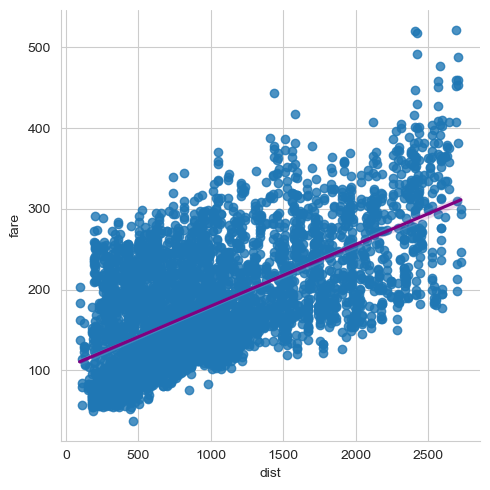

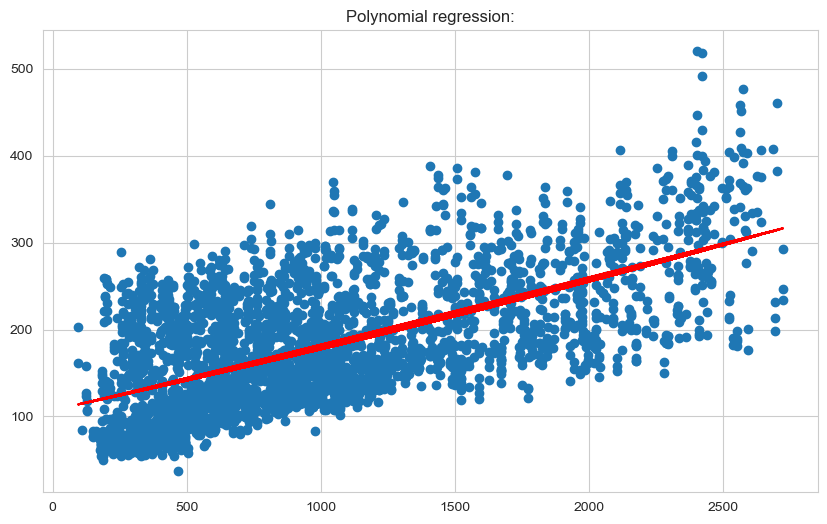

           2
6.582e-06 x + 0.05968 x + 110.8
Model 2: [[6.58167951e-02 3.95653918e-06]]
r2 score for second model is: 0.3878133734912447


In [1]:
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import statsmodels as sm
import sklearn.linear_model._base
from sklearn.linear_model._base import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
df=pd.read_excel('AIRFARE.xls')
df.columns=["year","origin","destin","id","dist","passen","fare","bmktshr","ldist","y98","y99","y00","lfare","ldistq","concen","lpassen"]
print(df.head())
df.describe()
model=LinearRegression()
x = df['dist']
y = df['fare']
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
X_train= X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
model.fit(X_train,y_train)
X_test = X_test.values.reshape(-1,1)
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print('r2 score for first model is:',r2)
sns.set_style('whitegrid')
sns.lmplot(x='dist',y='fare',data=df,line_kws={"color":"purple"})
c1 = model.coef_ 
print('Model:',c1)
MSE1 = mean_squared_error(y_test,y_pred)
print('Mean squared error:',MSE1)
#Оценка параметров линейной регрессии:
print('Перехват b0:',model.intercept_)#перехват линейной регрессии
print('Наклон b1:',model.coef_)#наклон(Х)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_reg_model=LinearRegression()
poly_features = poly.fit_transform(X_train.reshape(-1, 1))
poly_reg_model.fit(poly_features, y_train)
y_predicted = poly_reg_model.predict(poly_features)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.title("Polynomial regression:")
plt.scatter(X_train,y_train)
plt.plot(X_train,y_predicted, c="red")
plt.show()
model2 = np.poly1d(np.polyfit(df['dist'],df['fare'],2)) 
print(model2)
c2 = poly_reg_model.coef_ 
print('Model 2:',c2)
r2_2=r2_score(y_train,y_predicted) 
print('r2 score for second model is:',r2_2)

   year       origin         destin  id  dist  passen  fare  bmktshr  \
0  1998  "AKRON, OH"  "ATLANTA, GA"   1   528     265   106   0.8133   
1  1999  "AKRON, OH"  "ATLANTA, GA"   1   528     336   113   0.8262   
2  2000  "AKRON, OH"  "ATLANTA, GA"   1   528     298   123   0.8612   
3  1997  "AKRON, OH"  "ORLANDO, FL"   2   861     282   104   0.5798   
4  1998  "AKRON, OH"  "ORLANDO, FL"   2   861     178   105   0.5817   

      ldist  y98  y99  y00     lfare    ldistq  concen   lpassen  
0  6.269096    1    0    0  4.663439  39.30157  0.8133  5.579730  
1  6.269096    0    1    0  4.727388  39.30157  0.8262  5.817111  
2  6.269096    0    0    1  4.812184  39.30157  0.8612  5.697093  
3  6.758094    0    0    0  4.644391  45.67184  0.5798  5.641907  
4  6.758094    1    0    0  4.653960  45.67184  0.5817  5.181784  
r2 score for first model is: 0.39151861487637263
Model: [[0.07579741]]
Mean squared error: 3475.000391485977
Перехват b0: [103.11658502]
Наклон b1: [[0.07579741]]


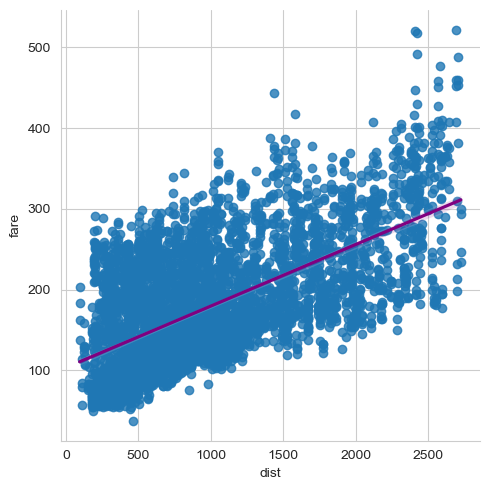

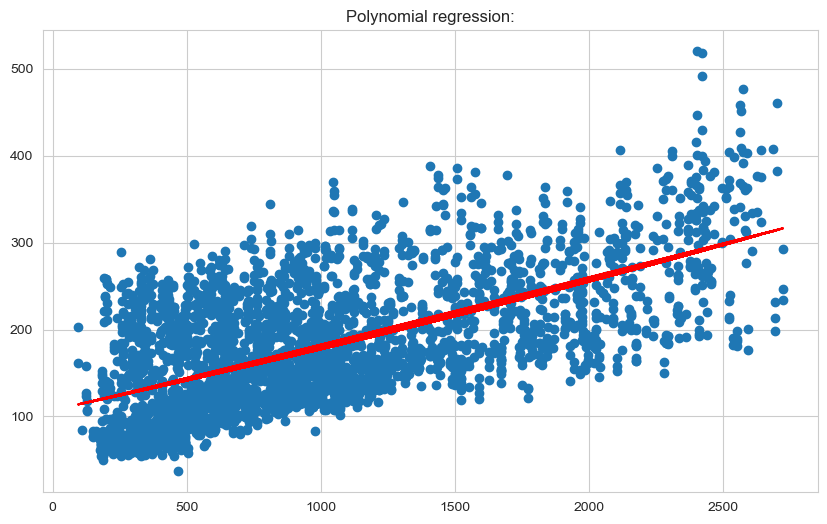

           2
6.582e-06 x + 0.05968 x + 110.8
Model 2: [[6.58167951e-02 3.95653918e-06]]
r2 score for second model is: 0.3878133734912447
